In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import StandardScaler, scale
import numpy as np

In [91]:
# Importing Data from using Pandas 
data = pd.read_csv('SocialAds.csv')

In [92]:
# Getting Quick look to the Dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              398 non-null    float64
 1   EstimatedSalary  396 non-null    float64
 2   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [93]:
# Checking for Missing Values 
data.isna().sum()

Age                2
EstimatedSalary    4
Purchased          0
dtype: int64

**Both Independent Variables are Normally Distributed**

<AxesSubplot:ylabel='Density'>

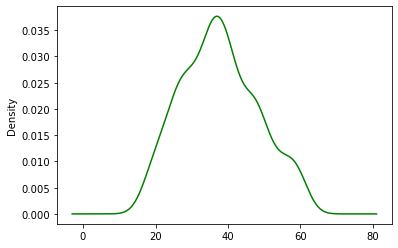

In [94]:
data.Age.plot.density(color='green')

<AxesSubplot:ylabel='Density'>

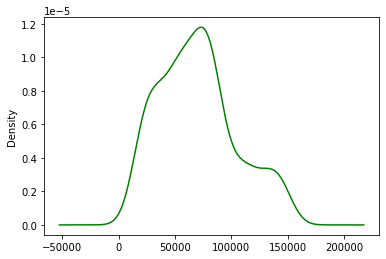

In [95]:
data.EstimatedSalary.plot.density(color='green')

In [96]:
X = data.drop(columns=['Purchased'])
Y = data['Purchased']

In [97]:
# Doing train_test Split 
X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


<AxesSubplot:>

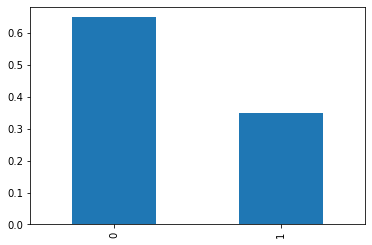

In [98]:
# Analysing the Output Variables 
Y_train.value_counts(normalize=True).plot(kind='bar') 

Data for not Buying product is almost double than Buying the product in our dataset 

In [99]:
# Filling missing values with appropriate Strategies 
imputer1 = SimpleImputer(strategy='most_frequent')
imputer2 = SimpleImputer(strategy='median')

Filling age with most frequent value
and EstimatedSalary with median value of traning data

In [100]:
# Definining Column transformer Object 
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('imputer1', imputer1, [0]), 
    ('imputer2', imputer2, [1])
], remainder='passthrough')


In [101]:
# Fitting the Traning Data and Applying same tranformation to Test Data
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [102]:
# Scaling the X Values (Feature Scaling)
X_train = scale(X_train)
X_test = scale(X_test)

In [103]:
# Fitting svm linear classifier 
from sklearn.svm import LinearSVC

Linear_SVC = LinearSVC(loss = 'hinge')
Linear_SVC.fit(X_train, Y_train)

LinearSVC(loss='hinge')

In [104]:
# Fitting svm linear kernel classifier 
from sklearn.svm import SVC

SVC_linear_kernel = SVC(kernel='linear', cache_size = 2000)
SVC_linear_kernel.fit(X_train, Y_train)

SVC(cache_size=2000, kernel='linear')

In [105]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=0.01, loss= 'hinge')
sgdc.fit(X_train, Y_train)    

SGDClassifier(tol=0.01)

**Result of different Classifiers with Default parameter values**

In [106]:
from prettytable import PrettyTable
t = PrettyTable(['Classifier', 'Accuracy', 'precision', 'Recall'])
t.add_row(['Linear SVC', accuracy_score(Y_test, Linear_SVC.predict(X_test))
                       , recall_score(Y_test, Linear_SVC.predict(X_test))
                       , precision_score(Y_test, Linear_SVC.predict(X_test))])

t.add_row(['SVC(linear Kernel) ', accuracy_score(Y_test, SVC_linear_kernel.predict(X_test))
                       , recall_score(Y_test, SVC_linear_kernel.predict(X_test))
                       , precision_score(Y_test, SVC_linear_kernel.predict(X_test))])

t.add_row(['SGDClassifier', accuracy_score(Y_test, sgdc.predict(X_test))
                       , recall_score(Y_test, sgdc.predict(X_test))
                       , precision_score(Y_test, sgdc.predict(X_test))])
print(t)


+---------------------+----------+--------------------+--------------------+
|      Classifier     | Accuracy |     precision      |       Recall       |
+---------------------+----------+--------------------+--------------------+
|      Linear SVC     |  0.8125  | 0.6129032258064516 | 0.8636363636363636 |
| SVC(linear Kernel)  |  0.8125  | 0.6129032258064516 | 0.8636363636363636 |
|    SGDClassifier    |  0.8625  | 0.7741935483870968 | 0.8571428571428571 |
+---------------------+----------+--------------------+--------------------+


**Obtaining results with best parameter values of linear classifiers and rbf classifier**

In [107]:
parameters = {'C': [1, 10, 100, 1000, 10000, 100000]}
svm_clf = LinearSVC(loss="hinge")
random_rbf_clf = RandomizedSearchCV(svm_clf, parameters, cv=12, return_train_score=False, n_iter=2, random_state=0)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    random_rbf_clf.fit(X_train, Y_train)
accuracy_score(Y_test, random_rbf_clf.predict(X_test))

t = PrettyTable(['Classifier', 'Accuracy', 'precision', 'Recall'])
t.add_row(['Linear SVC', accuracy_score(Y_test, random_rbf_clf.predict(X_test))
                       , recall_score(Y_test, random_rbf_clf.predict(X_test))
                       , precision_score(Y_test, random_rbf_clf.predict(X_test))])


In [108]:
parameters = {'C': [1, 10, 100, 1000, 10000, 100000]}
SVC_linear_kernel = SVC(kernel='linear', cache_size = 2000)
random_rbf_clf = RandomizedSearchCV(SVC_linear_kernel, parameters, cv=12, return_train_score=False, n_iter=2, random_state=0)
random_rbf_clf.fit(X_train, Y_train)

t.add_row(['SVC(linear Kernel)', accuracy_score(Y_test, random_rbf_clf.predict(X_test))
                       , recall_score(Y_test, random_rbf_clf.predict(X_test))
                       , precision_score(Y_test, random_rbf_clf.predict(X_test))])

In [109]:
rbf = SVC(random_state=0, cache_size = 2000)
rbf.fit(X_train, Y_train)
t.add_row(['SVC(rbf kernel) Default parameter', accuracy_score(Y_test, rbf.predict(X_test))
                       , recall_score(Y_test, rbf.predict(X_test))
                       , precision_score(Y_test, rbf.predict(X_test))])

In [110]:
parameters = {'kernel':['rbf'], 'C': [1, 10, 50, 100, 1000, 10000, 100000], 'gamma':[1, 10, 50, 100, 1000, 10000, 100000]}
rbf_clf = SVC(random_state=0, cache_size = 2000)
random_rbf_clf = RandomizedSearchCV(rbf_clf, parameters, cv=12, return_train_score=False, n_iter=30, random_state=0)
random_rbf_clf.fit(X_train, Y_train)

t.add_row(['SVC(rbf kernel)', accuracy_score(Y_test, random_rbf_clf.predict(X_test))
                       , recall_score(Y_test, random_rbf_clf.predict(X_test))
                       , precision_score(Y_test, random_rbf_clf.predict(X_test))])

In [111]:
print(t)

+-----------------------------------+----------+--------------------+--------+
|             Classifier            | Accuracy |     precision      | Recall |
+-----------------------------------+----------+--------------------+--------+
|             Linear SVC            |   0.85   | 0.7096774193548387 |  0.88  |
|         SVC(linear Kernel)        |  0.8375  | 0.6774193548387096 | 0.875  |
| SVC(rbf kernel) Default parameter |  0.9125  | 0.9032258064516129 | 0.875  |
|          SVC(rbf kernel)          |  0.9125  | 0.9032258064516129 | 0.875  |
+-----------------------------------+----------+--------------------+--------+


**REPORT**

OBSERVATION 1:- Linear svc and svc(kernel=linear) both gives us same accuracy as both are Linear classifiers just that svc(kernel=linear) have more run time 

OBSERVATION 2:- Amongst the Linear classifiers, SGDClassifier always gives the highest accuracy 

OBSERVATION 3:- After Regularization using RandomSearchCV we found out the best C value which in turn gives best accuracy 

OBSERVATION 4:- Non-Linear Kernel(rbf) gives us the best accuracy amongst all the classifiers with 91.5% Accuracy as our Dataset was not linear separable 

OBSERVATION 5:- SVM classifier is sensitive to Feature Scaling. After Feature scaling our accuracy got increased.

OBSERVATION 6:- I chosed to Scale the Data with Normalization because Our Independent variables are normally Distributed.

